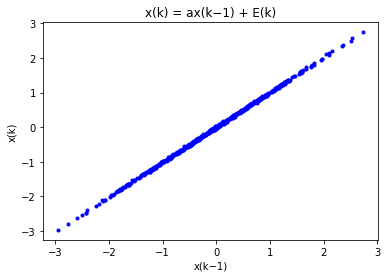

,𝑘-1,input values 𝑥(𝑘-1),𝑘,estimated output values 𝑥(𝑘)
0,0,-0.040257,1,-0.066687
1,1,-0.007259,2,-0.036614
2,2,-1.016622,3,-1.028231
3,3,0.385505,4,0.404845
4,4,-0.339148,5,-0.320510
...,...,...,...,...
497,497,1.538949,498,1.536485
498,498,-0.446621,499,-0.435470
499,499,0.277009,500,0.287490
500,500,0.430049,501,0.453369


In [3]:
# the coding part for the report in Assignment #1

import numpy as np
from random import gauss
from random import seed
from pandas import Series
import pandas as pd
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

# Step 1: Generating the data

# seed random number generator
seed(1)

# equation(1)
# 𝑥(𝑘) = a𝑥(𝑘−1) + 𝜀(𝑘)
a = 0.99

number = list(range(1,503))       # k
number_2 = list(range(0,502))     # k-1

# create white noise series  𝜀(k)
noise = [gauss(0.0, 0.02) for i in range(502)]   # gauss(mean, variance)
noise = Series(noise)  

# ------------------------- input values 𝑥(𝑘−1) ----------------------------- #
# create random input samples x(k)

inputs = [gauss(0.0, 0.995) for i in range(502)]   # gauss(mean, variance)
inputs = list(Series(inputs))                      # input values 𝑥(k−1)

# --------------------- estimated output values 𝑥(𝑘) ------------------------ #
# By using the quation(1), we can come out with numbers of 𝑥(𝑘) shown below:

outputs = list((inputs-noise)/a)                   # estimated output values 𝑥(k)


# ============================================================================ #
# --the organized form of k, k-1, input values, and estimated output values -- #
# ============================================================================ #

data = {'𝑘-1': number_2,                     # k-1
    'input values 𝑥(𝑘-1)': inputs,           # input values
    '𝑘': number,                             # k
    'estimated output values 𝑥(𝑘)': outputs} # estimated output values
df = pd.DataFrame(data)


# plot_𝑥(𝑘) = a𝑥(𝑘−1) + 𝜀(𝑘)
plt.plot(inputs, outputs, 'b.')              # plot x(k)
plt.title('x(k) = ax(k−1) + E(k)')
plt.xlabel('x(k−1)')
plt.ylabel('x(k)')
plt.show()
df                                           # display the form for all values 



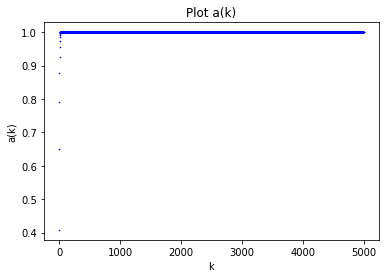

True value of a:  0.99
Estimate of a:  0.9999999999999937


In [7]:
# ============================================================================ #
# ----------------------------- LMS Algorithm, a(k) -------------------------- #
# ============================================================================ #

# Step 2: estimate the parameter a in equation (1) using the LMS algorithm
# Step 3: Record the final estimated a value. 
#         And Plot 𝑎(n) and also the instantaneous cost

a = 0.99     # the value from Step 1
aa = 0       # start from 𝑎(0) = 0
iter = 5000
lr = 0.001   # learning rate
k = 500


# -------------------------- input values (1~500) ----------------------------#
inputv = np.array(df.loc[1:500, 'input values 𝑥(𝑘-1)'])
# print(inputv)

# -------------------- desire output values (2~501) --------------------------#
d_outputv = np.array(df.loc[1:500, 'input values 𝑥(𝑘-1)'])
# print(d_outputv)

# ------------------- estimated output values (2~501) ------------------------#
outputv = np.array(df.loc[2:501, 'estimated output values 𝑥(𝑘)'])
# print(outputv)


# ----------------------------------------------------------------------------#

# plot - k vs. a(k)
for _ in range(iter):
    for i in range(k):
        error = d_outputv[i] - inputv[i]*aa  # error function
        aa = aa + lr*error*inputv[i]         # find the last estimated parameter a
#     print(aa)                              # print to see the pattern of 
#                                              running estimated values
    plt.plot(_, aa, 'xb-', markersize=1)     # plot a(k)
plt.title('Plot a(k)')
plt.xlabel('k')
plt.ylabel('a(k)')
plt.show()


# True value of a vs. estimate of a        
print('True value of a: ', a)
print('Estimate of a: ', aa)



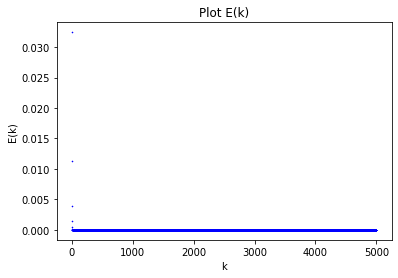

Estimate of E(k):  3.6993262371790026e-30


In [9]:
# ============================================================================ #
# --------------------- LMS Algorithm, cost function E(k)--------------------- #
# ============================================================================ #

a = 0.99     # the value from Step 1
aa = 0       # start from 𝑎(0) = 0
iter = 5000
lr = 0.001   # learning rate
k = 500


# -------------------------- input values (1~500) ----------------------------#
inputv = np.array(df.loc[1:500, 'input values 𝑥(𝑘-1)'])
# print(inputv)

# -------------------- desire output values (2~501) --------------------------#
d_outputv = np.array(df.loc[1:500, 'input values 𝑥(𝑘-1)'])
# print(d_outputv)

# ------------------- estimated output values (2~501) ------------------------#
outputv = np.array(df.loc[2:501, 'estimated output values 𝑥(𝑘)'])
# print(outputv)


# ----------------------------------------------------------------------------#


# plot - k vs. E(k) -- cost function
for _ in range(iter):
    for i in range(k):
        error = d_outputv[i] - inputv[i]*aa  # error function
        aa = aa + lr*error*inputv[i]            
        cost = 0.5*error*error               # find the last estimated value of E(k)
#     print(cost)                            # print to see the pattern of 
#                                               running estimated values
    plt.plot(_, cost, 'xb-', markersize=1)   # E(k)
plt.title('Plot E(k)')
plt.xlabel('k')
plt.ylabel('E(k)')
plt.show()

# The last estimated value of E(k) before the errors are no more
print('Estimate of E(k): ', cost)     # the value can be considered zero


